<a href="https://colab.research.google.com/github/PoonamSarawgi/Deep-Leaning/blob/main/Lending_Club_Loan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

To download the data sets click here


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow

In [ ]:
!pip install keras

In [ ]:
#load data
df = pd.read_csv('loan_data.csv')

In [ ]:
df.shape

(9578, 14)

In [ ]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
df['not.fully.paid'].unique

<bound method Series.unique of 0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64>

In [ ]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

#EDA

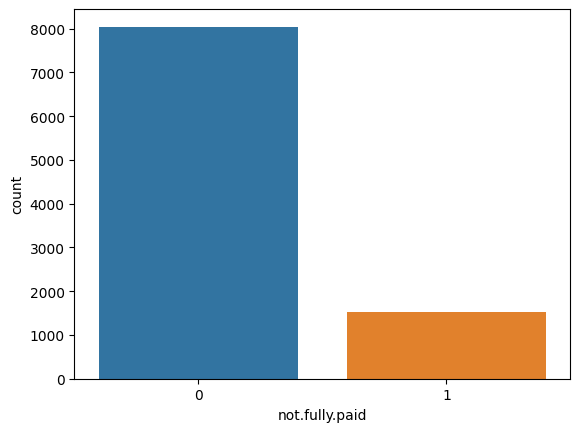

In [ ]:
sns.countplot(x=df['not.fully.paid'])
plt.show()

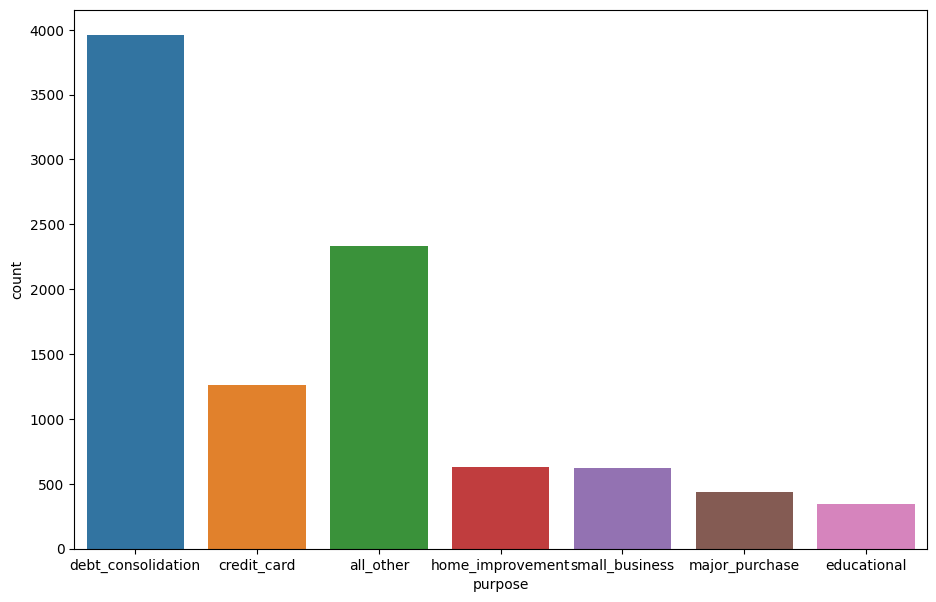

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x=df['purpose'])
plt.show()

# Handle Imbalance Data

In [ ]:
not_fully_paid_0 = df[df['not.fully.paid']==0]

In [ ]:
not_fully_paid_1 = df[df['not.fully.paid']==1]

In [ ]:
not_fully_paid_0.shape

(8045, 14)

In [ ]:
not_fully_paid_1.shape

(1533, 14)

In [ ]:
from sklearn.utils import resample
from sklearn.utils import shuffle

In [ ]:
df_sampled_data = resample(not_fully_paid_1, replace=True,n_samples=8045)

In [ ]:
df_sampled_data.shape

(8045, 14)

In [ ]:
new_data = pd.concat([not_fully_paid_0,df_sampled_data])

In [ ]:
new_data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,1,all_other,0.1284,255.50,10.714418,0.00,757,1410.000000,0,0.0,0,0,0,1
6680,1,debt_consolidation,0.1565,223.92,10.757903,8.94,662,2580.000000,0,0.0,0,0,1,1
421,1,credit_card,0.1236,767.89,11.461632,16.07,702,2580.000000,806,10.3,2,0,0,1
1724,1,debt_consolidation,0.1379,340.76,10.596635,21.63,682,7380.041667,15615,87.7,3,0,1,1


In [ ]:
new_data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [ ]:
new_data = shuffle(new_data)

In [ ]:
new_data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8565,0,credit_card,0.1324,216.39,10.518673,25.07,717,4590.000000,13913,43.0,0,0,0,0
1768,1,all_other,0.1221,159.92,11.127322,3.99,702,5040.000000,468,7.2,1,1,0,0
3314,1,debt_consolidation,0.1426,686.12,11.407565,22.81,687,4505.000000,28619,74.3,1,0,1,1
2404,1,all_other,0.1189,530.63,11.225243,3.06,752,3750.000000,4498,5.3,0,0,0,1
743,1,all_other,0.1039,272.59,10.463218,19.61,717,4439.958333,213,7.1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1,home_improvement,0.1316,185.74,10.122623,23.52,692,2850.041667,22479,86.8,2,0,0,1
6857,1,credit_card,0.0859,369.84,11.350407,8.03,787,5250.041667,15917,22.0,2,0,0,0
7691,1,debt_consolidation,0.1461,206.86,10.308953,16.20,682,1769.958333,16626,91.9,2,0,0,1
7398,1,debt_consolidation,0.0788,156.41,10.621327,14.84,722,3390.041667,1451,31.5,0,0,0,1


In [ ]:
new_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8565,0,credit_card,0.1324,216.39,10.518673,25.07,717,4590.000000,13913,43.0,0,0,0,0
1768,1,all_other,0.1221,159.92,11.127322,3.99,702,5040.000000,468,7.2,1,1,0,0
3314,1,debt_consolidation,0.1426,686.12,11.407565,22.81,687,4505.000000,28619,74.3,1,0,1,1
2404,1,all_other,0.1189,530.63,11.225243,3.06,752,3750.000000,4498,5.3,0,0,0,1
743,1,all_other,0.1039,272.59,10.463218,19.61,717,4439.958333,213,7.1,1,0,1,0


In [ ]:
new_data.shape

(16090, 14)

# Feature Transformation

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
for i in new_data.columns:
    if new_data[i].dtypes=='object':
        new_data[i]=le.fit_transform(new_data[i])

In [ ]:
new_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8565,0,1,0.1324,216.39,10.518673,25.07,717,4590.000000,13913,43.0,0,0,0,0
1768,1,0,0.1221,159.92,11.127322,3.99,702,5040.000000,468,7.2,1,1,0,0
3314,1,2,0.1426,686.12,11.407565,22.81,687,4505.000000,28619,74.3,1,0,1,1
2404,1,0,0.1189,530.63,11.225243,3.06,752,3750.000000,4498,5.3,0,0,0,1
743,1,0,0.1039,272.59,10.463218,19.61,717,4439.958333,213,7.1,1,0,1,0


In [ ]:
le.classes_

array(['all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business'],
      dtype=object)

# Additional Feature Engineering

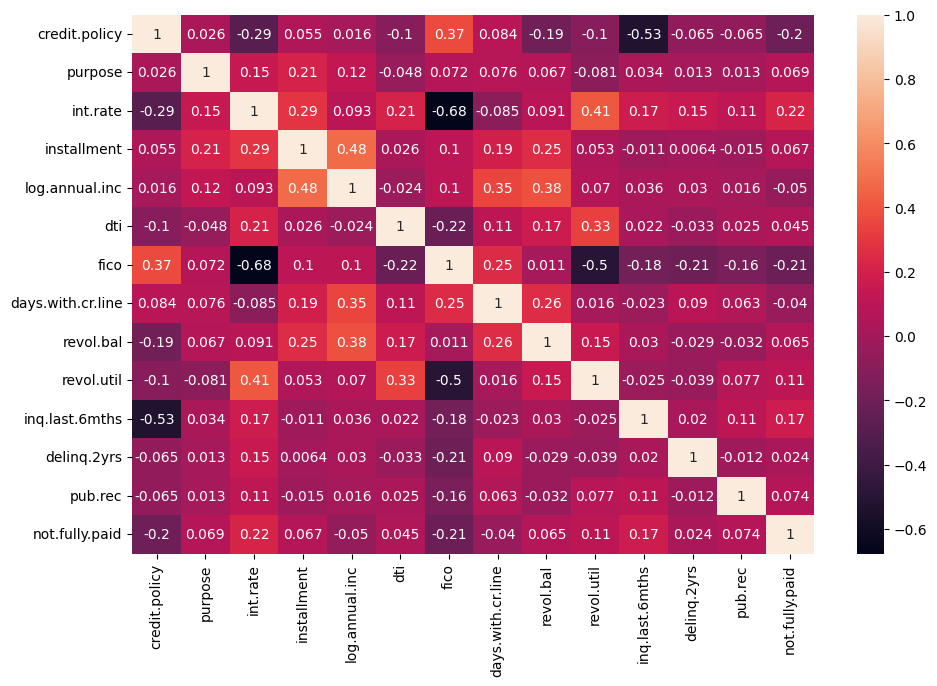

In [ ]:
plt.figure(figsize=(11,7))
sns.heatmap(new_data.corr(),annot=True)
plt.show()

In [ ]:
new_data.corr().abs()['not.fully.paid'].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.216975
fico                 0.213406
credit.policy        0.202869
inq.last.6mths       0.174260
revol.util           0.105220
pub.rec              0.074205
purpose              0.069243
installment          0.067210
revol.bal            0.065208
log.annual.inc       0.049875
dti                  0.045244
days.with.cr.line    0.040050
delinq.2yrs          0.023955
Name: not.fully.paid, dtype: float64

In [ ]:
new_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
X = new_data[['credit.policy', 'purpose', 'int.rate', 'installment',
       'fico', 'revol.bal', 'revol.util','inq.last.6mths', 'pub.rec']]

In [ ]:
X.shape

(16090, 9)

In [ ]:
y=new_data[['not.fully.paid']]

In [ ]:
y.shape

(16090, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
sc = StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.5882356 , -0.58002586,  0.98359158, ...,  0.68352808,
         0.04752755, -0.27897731],
       [ 0.5882356 , -0.01992887, -0.05324119, ..., -0.68551436,
        -0.73730205, -0.27897731],
       [ 0.5882356 ,  0.54016812, -1.61219331, ..., -1.39411422,
        -0.73730205, -0.27897731],
       ...,
       [ 0.5882356 ,  2.22045909, -0.44945942, ...,  1.39556775,
        -0.73730205, -0.27897731],
       [ 0.5882356 , -0.01992887, -1.70476766, ..., -0.28305716,
         0.83235716, -0.27897731],
       [-1.69999911, -0.01992887, -0.8975193 , ..., -0.18330281,
         0.83235716, -0.27897731]])

# Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Creat ANN
model = Sequential()
# Creat 1st Hidden Layer
model.add(Dense(19, activation='relu', input_shape=(9,)))
model.add(Dropout(0.3)) # Dropout is capble of handling overfitting

# Creat 2nd Hidden
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))

# Create Output Layer
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.3))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                190       
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
 dropout_2 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable pa

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Earlystopping
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta = 0.01,
                           mode = 'min',
                           verbose=1,
                           patience=10)

In [ ]:
history_with_early_stop=model.fit(X_train,y_train,
                 epochs=50,
                 batch_size=256,
                 validation_data=(X_test,y_test),
                 callbacks=[early_stop])

Epoch 1/50
51/51 [==============================] - 1s 5ms/step - loss: 3.0750 - accuracy: 0.4938 - val_loss: 0.7384 - val_accuracy: 0.4975
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 2.8514 - accuracy: 0.5035 - val_loss: 0.7230 - val_accuracy: 0.5047
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 2.8324 - accuracy: 0.5159 - val_loss: 0.7141 - val_accuracy: 0.5019
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 2.9100 - accuracy: 0.5267 - val_loss: 0.7069 - val_accuracy: 0.5000
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 2.7967 - accuracy: 0.5375 - val_loss: 0.7024 - val_accuracy: 0.4997
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 2.7956 - accuracy: 0.5467 - val_loss: 0.6992 - val_accuracy: 0.4994
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 2.7519 - accuracy: 0.5442 - val_loss: 0.6975 - val_accuracy: 0.4994
Epoch 8/50
51/51 [==

In [ ]:
history_no_early_stop=model.fit(X_train,y_train,
                 epochs=50,
                 batch_size=256,
                 validation_data=(X_test,y_test))

Epoch 1/50
51/51 [==============================] - 0s 3ms/step - loss: 2.8111 - accuracy: 0.5671 - val_loss: 0.6961 - val_accuracy: 0.4972
Epoch 2/50
51/51 [==============================] - 0s 2ms/step - loss: 2.8363 - accuracy: 0.5535 - val_loss: 0.6983 - val_accuracy: 0.4978
Epoch 3/50
51/51 [==============================] - 0s 2ms/step - loss: 2.7690 - accuracy: 0.5629 - val_loss: 0.6982 - val_accuracy: 0.4978
Epoch 4/50
51/51 [==============================] - 0s 2ms/step - loss: 2.7710 - accuracy: 0.5675 - val_loss: 0.6975 - val_accuracy: 0.4978
Epoch 5/50
51/51 [==============================] - 0s 2ms/step - loss: 2.7008 - accuracy: 0.5688 - val_loss: 0.6957 - val_accuracy: 0.4978
Epoch 6/50
51/51 [==============================] - 0s 2ms/step - loss: 2.6401 - accuracy: 0.5719 - val_loss: 0.6958 - val_accuracy: 0.4978
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 2.8431 - accuracy: 0.5562 - val_loss: 0.6961 - val_accuracy: 0.4978
Epoch 8/50
51/51 [==

In [ ]:
# Evaluate the model
model.evaluate(X_train,y_train)

403/403 [==============================] - 1s 2ms/step - loss: 0.6972 - accuracy: 0.5073


[0.6971821188926697, 0.5073027014732361]

In [ ]:
# Evaluate the model
model.evaluate(X_test,y_test)

101/101 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.5053


[0.7001655697822571, 0.5052827596664429]

In [ ]:
# Evaluate the model without early stopping
loss_no_early_stop, accuracy_no_early_stop = model.evaluate(X_test, y_test)

# Evaluate the model with early stopping
loss_with_early_stop, accuracy_with_early_stop = model.evaluate(X_test, y_test)

print("Accuracy without early stopping:", accuracy_no_early_stop)
print("Loss without early stopping:", loss_no_early_stop)
print("Accuracy with early stopping:", accuracy_with_early_stop)
print("Loss with early stopping:", loss_with_early_stop)


101/101 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.5053
Accuracy without early stopping: 0.5052827596664429
Loss without early stopping: 0.7001655697822571
Accuracy with early stopping: 0.5052827596664429
Loss with early stopping: 0.7001655697822571


In [ ]:
# Evaluate the model without early stopping
loss_no_early_stop, accuracy_no_early_stop = model.evaluate(X_train, y_train)

# Evaluate the model with early stopping
loss_with_early_stop, accuracy_with_early_stop = model.evaluate(X_train, y_train)

print("Accuracy without early stopping:", accuracy_no_early_stop)
print("Loss without early stopping:", loss_no_early_stop)
print("Accuracy with early stopping:", accuracy_with_early_stop)
print("Loss with early stopping:", loss_with_early_stop)


403/403 [==============================] - 1s 2ms/step - loss: 0.6972 - accuracy: 0.5073
Accuracy without early stopping: 0.5073027014732361
Loss without early stopping: 0.6971821188926697
Accuracy with early stopping: 0.5073027014732361
Loss with early stopping: 0.6971821188926697


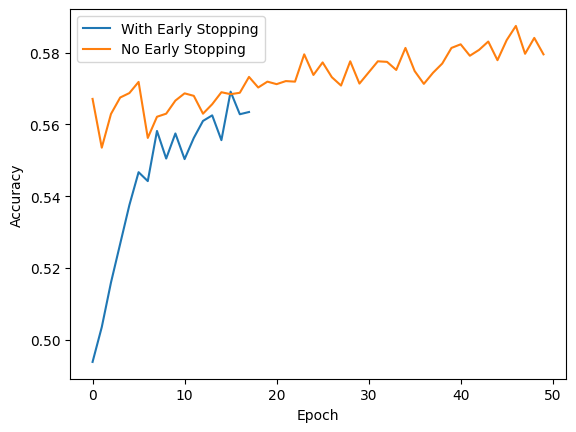

In [ ]:
plt.plot(history_with_early_stop.history['accuracy'], label='With Early Stopping')
plt.plot(history_no_early_stop.history['accuracy'], label='No Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Hyperparameter Tuning

In [ ]:
!pip install keras-tuner

In [ ]:
import keras_tuner

In [ ]:
# create a function
def build_model(hp):
    model=Sequential()

    # first hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh']),input_shape=[9]))
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))


     # second hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))

# third hidden layer
    model.add(Dense(units=hp.Int('units',min_value=32,max_value=1024,step=16),
                   activation=hp.Choice('activation',['relu','tanh'])))
    model.add(Dropout(hp.Float('rate',min_value=0.1,max_value=0.5,step=0.1)))

    #output layer
    model.add(Dense(1,activation='sigmoid'))

    learning_rate=hp.Float('learning_rate',min_value=0.001,max_value=0.1,step=0.01)

    model.compile(loss='binary_crossentropy',optimizer=tensorflow.keras.optimizers.Adam(learning_rate),
                 metrics=['accuracy'])
    return model

In [ ]:
import keras_tuner as kt

In [ ]:
build_model(kt.HyperParameters())

In [ ]:
rtuner=kt.RandomSearch(hypermodel=build_model,
                      objective='val_accuracy',
                      max_trials=3,
                     overwrite=True
                  )

In [ ]:
rtuner.search(X_train, y_train, epochs=4, validation_data=(X_test, y_test), verbose=1)

Trial 3 Complete [00h 00m 09s]
val_accuracy: 0.6019266843795776

Best val_accuracy So Far: 0.620261013507843
Total elapsed time: 00h 01m 16s


In [ ]:
rtuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
units: 848
activation: relu
rate: 0.1
learning_rate: 0.031
Score: 0.620261013507843

Trial 2 summary
Hyperparameters:
units: 336
activation: tanh
rate: 0.1
learning_rate: 0.041
Score: 0.6019266843795776

Trial 0 summary
Hyperparameters:
units: 928
activation: tanh
rate: 0.1
learning_rate: 0.041
Score: 0.593536376953125


In [ ]:
models=rtuner.get_best_models()

In [ ]:
models[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 848)               8480      
                                                                 
 dropout (Dropout)           (None, 848)               0         
                                                                 
 dense_1 (Dense)             (None, 848)               719952    
                                                                 
 dropout_1 (Dropout)         (None, 848)               0         
                                                                 
 dense_2 (Dense)             (None, 848)               719952    
                                                                 
 dropout_2 (Dropout)         (None, 848)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 8

In [ ]:
# print accuracy score
from sklearn.metrics import accuracy_score
y_pred_hp=models[0].predict(X_test)>=0.5

101/101 [==============================] - 0s 4ms/step


In [ ]:
print(accuracy_score(y_pred_hp,y_test))

0.620261031696706
